In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import cv2
import tensorflow as tf
import os
import pandas as pd

In [11]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
	"../leaves/images/",
	shuffle = True,
	image_size = (IMAGE_SIZE, IMAGE_SIZE),
	batch_size = BATCH_SIZE
)
class_names = dataset.class_names

Found 7221 files belonging to 8 classes.


In [13]:
def load_image():
	for image_batch, label_batch in dataset.take(1):
		img = image_batch[0].numpy().astype("uint8")
		type_leave = class_names[label_batch[0]]
	return img, type_leave

In [14]:
def remove_back(img, size_fill, enhance_val, buffer_size):
	img_img = Image.fromarray(img, mode="RGB")
	contr_img = ImageEnhance.Contrast(img_img).enhance(enhance_val)
	gray_img = pcv.rgb2gray_lab(rgb_img=np.array(contr_img), channel='a')
	thresh = pcv.threshold.triangle(gray_img=gray_img, object_type="dark", xstep= 100)
	edge_ok = pcv.fill(bin_img=thresh, size=5000)
	mask = pcv.fill(bin_img=pcv.invert(gray_img=edge_ok), size=size_fill)
	contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	mask_with_buffer = mask.copy()
	if (len(contours)):
		cv2.drawContours(mask_with_buffer, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), buffer_size)
	if (mask_with_buffer[0,0] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[-1,0] == 0):
		mask_with_buffer[0:11,0:11] = 255
		mask_with_buffer[-11:,-11:] = 255
		mask_with_buffer[0:11,-11:] = 255
		mask_with_buffer[-11:,0:11] = 255
	mask_with_buffer[0:1,:] = 255
	mask_with_buffer[-1:,:] = 255
	mask_with_buffer[:,0:1] = 255
	mask_with_buffer[:,-1:] = 255
	mask_with_buffer = pcv.fill(bin_img=mask_with_buffer, size=size_fill)
	result = np.ones_like(img) * 255
	result[mask_with_buffer == 0] = img[mask_with_buffer == 0]
	return result

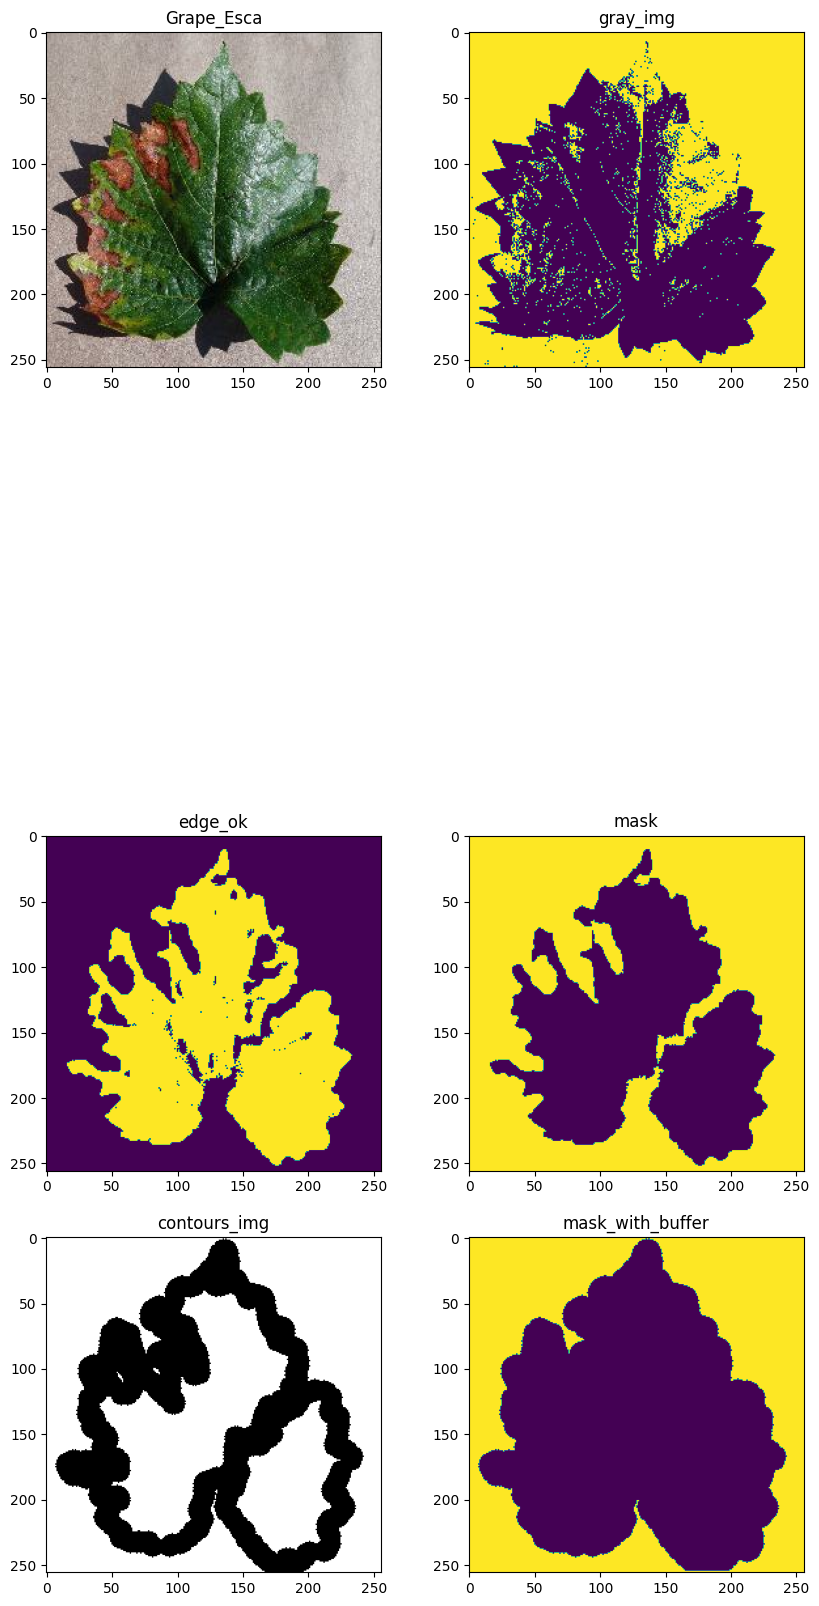

In [16]:
img, type_leave = load_image()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to highlight contrast
# Adjust the block size and C value based on your image

_,contrasted = cv2.threshold(gray_img,0,  255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

gray_img = pcv.rgb2gray_lab(rgb_img=img, channel='a')
# Display the original and thresholded images
thresh = pcv.threshold.triangle(gray_img=gray_img, object_type="dark", xstep= 100)
thresh = pcv.threshold.triangle(gray_img=gray_img, object_type="dark", xstep= 100)
edge_ok = pcv.fill(bin_img=thresh, size=5000)
mask = pcv.fill(bin_img=pcv.invert(gray_img=edge_ok), size=1000)
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_img = np.ones_like(img) * 255
mask_with_buffer = mask.copy()
if (len(contours)):
	cv2.drawContours(mask_with_buffer, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), 15)
	cv2.drawContours(contours_img, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), 15)
if (mask_with_buffer[0,0] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[-1,0] == 0):
	mask_with_buffer[0:11,0:11] = 255
	mask_with_buffer[-11:,-11:] = 255
	mask_with_buffer[0:11,-11:] = 255
	mask_with_buffer[-11:,0:11] = 255
mask_with_buffer[0:1,:] = 255
mask_with_buffer[-1:,:] = 255
mask_with_buffer[:,0:1] = 255
mask_with_buffer[:,-1:] = 255
mask_with_buffer = pcv.fill(bin_img=mask_with_buffer, size=1000)
result = np.ones_like(img) * 255
result[mask_with_buffer == 0] = img[mask_with_buffer == 0]

plt.figure(figsize=(2 * 5, 4 * 5))
plt.subplot(4, 2, 1)
plt.title(type_leave)
plt.imshow(img)
plt.subplot(4, 2, 2)
plt.title("gray_img")
plt.imshow(contrasted)
plt.subplot(4, 2, 5)
plt.title("edge_ok")
plt.imshow(edge_ok)
plt.subplot(4, 2, 6)
plt.title("mask")
plt.imshow(mask)
plt.subplot(4, 2, 7)
plt.title("contours_img")
plt.imshow(contours_img)
plt.subplot(4, 2, 8)
plt.title("mask_with_buffer")
plt.imshow(mask_with_buffer)
plt.show()